# pandas 使用简介
之前提到，实践中大多数据使用csv和json格式存储

pandas是用来处理csv的一个利器

[中文官网](http://www.pypandas.cn/)

In [1]:
import pandas as pd
df1 = pd.DataFrame({'account_name': ['Lim', 'Jack', 'Sam', 'Lee'],
'type': ['Savings', 'Current', 'Loan', 'Savings']})
print(df1)

  account_name     type
0          Lim  Savings
1         Jack  Current
2          Sam     Loan
3          Lee  Savings


In [3]:
df2 = pd.DataFrame({'type': ['Savings', 'Loan', 'Current'],
'interestRate': [2, 8, 3]})
print(df2)

      type  interestRate
0  Savings             2
1     Loan             8
2  Current             3


In [4]:
df3 = pd.merge(df1, df2)
print (df3)

  account_name     type  interestRate
0          Lim  Savings             2
1          Lee  Savings             2
2         Jack  Current             3
3          Sam     Loan             8


In [3]:
df1 = pd.DataFrame({'account_name': ['Lim', 'Jack', 'Sam', 'Lee'],
'type': ['Savings', 'Current', 'Loan', 'Savings']})
print(df1)
print(df1.keys())
print(df1['account_name'])

  account_name     type
0          Lim  Savings
1         Jack  Current
2          Sam     Loan
3          Lee  Savings
Index(['account_name', 'type'], dtype='object')
0     Lim
1    Jack
2     Sam
3     Lee
Name: account_name, dtype: object


In [6]:
df2 = pd.DataFrame({'account_name': ['Lee', 'Lim', 'Sam', 'Jack'],
'amount': [10000, 70000, -20000, 50000]})
print(df2)

  account_name  amount
0          Lee   10000
1          Lim   70000
2          Sam  -20000
3         Jack   50000


In [7]:
df3 = pd.merge(df1, df2)

print(df3)
df3.shape

  account_name     type  amount
0          Lim  Savings   70000
1         Jack  Current   50000
2          Sam     Loan  -20000
3          Lee  Savings   10000


(4, 3)

其余操作自行查询
### md
### 数据读入
如何从.csv文件读取

In [10]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### 一个小小的使用pandas回归的例子
#### What sort of relationship are we seeing between `TV` and `Sales`?

<AxesSubplot:xlabel='TV', ylabel='Sales'>

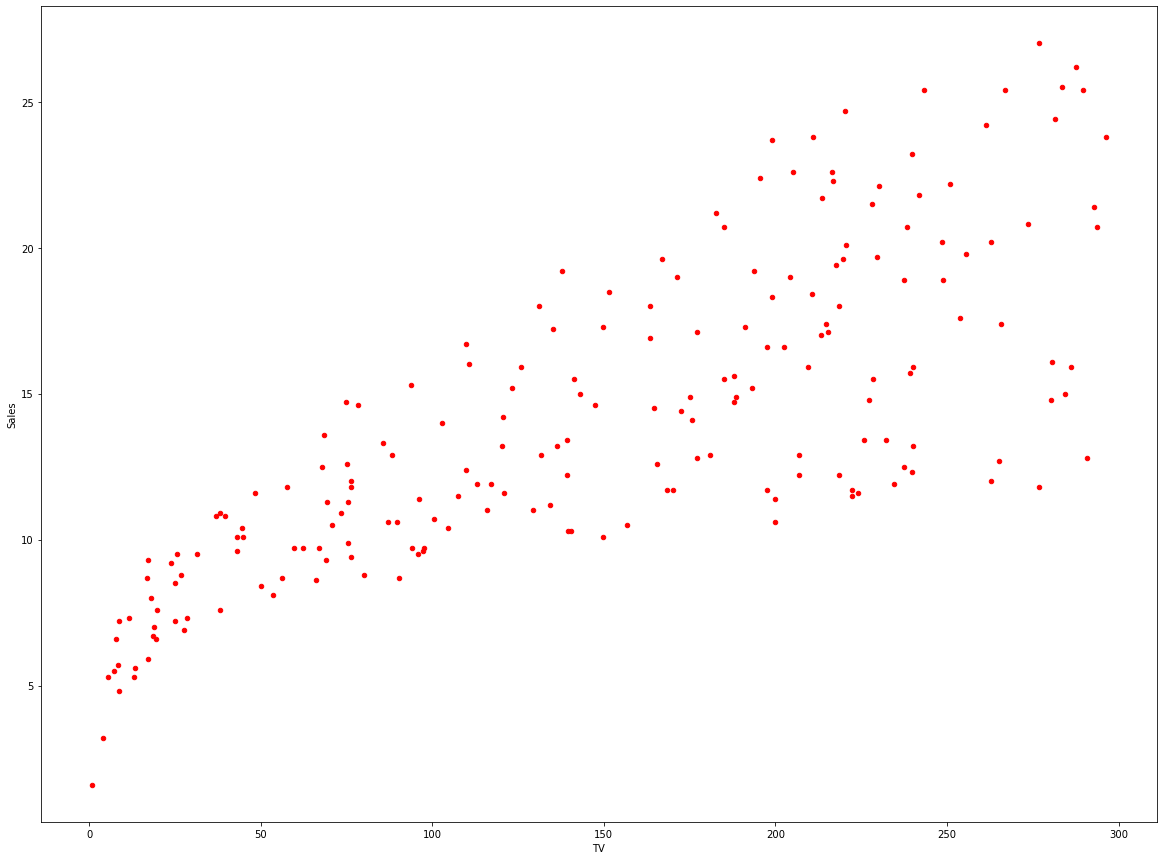

In [11]:
data.plot.scatter(x="TV", y="Sales", c="red", figsize=(20,15))

In [12]:
y = data["Sales"]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [15]:
X = data["TV"]
X

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [19]:
X = sm.add_constant(X)
modelTv = sm.OLS(y, X).fit()

D:\Anaconda3\envs\python38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
modelTv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           1.47e-42
Time:                        19:49:19   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
y_intercept = modelTv.params[0]
print(y_intercept)

tv = modelTv.params[1]
print(tv)


7.032593549127695
0.04753664043301977


In [24]:
predictions = data["TV"] * tv + y_intercept
predictions

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Name: TV, Length: 200, dtype: float64

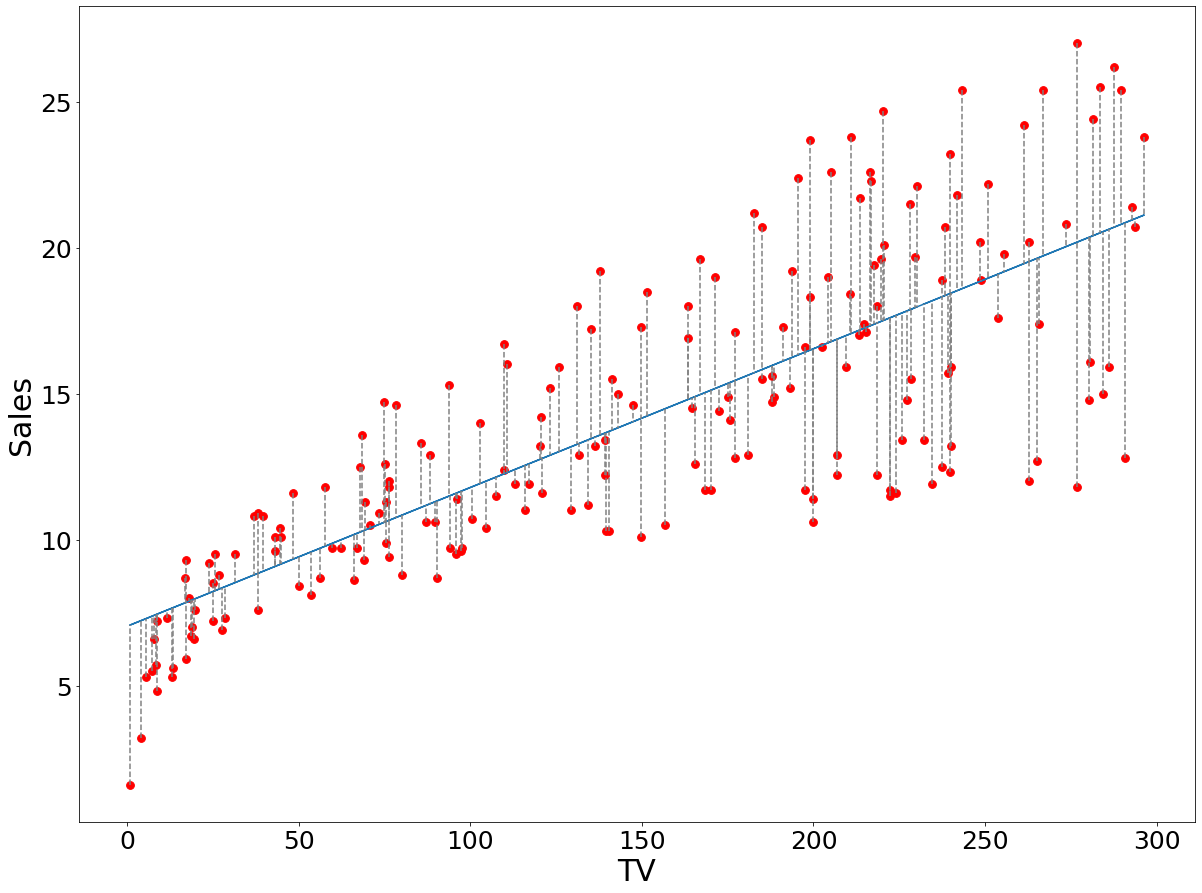

In [25]:
#make the points bigger
data.plot.scatter(x="TV", y="Sales", c="red", s= 60, figsize=(20,15), fontsize=25)

#change font size of axis to be bigger
plt.xlabel('TV', fontsize=30)
plt.ylabel('Sales', fontsize=30)

plt.plot(data["TV"], predictions)

#add in segment lines for the residuals
residuals = predictions - y

for i in range(len(predictions)):
    x_values = [data["TV"][i], data["TV"][i]]
    y_values = [data["Sales"][i], predictions[i]]
    plt.plot(x_values, y_values, "--", c="gray")

### 一个小小的test

读入news.csv的内容
查看里面的列名，行数等数据

                  id                                           news_url  \
0    politifact15014          speedtalk.com/forum/viewtopic.php?t=51650   
1    politifact15156  politics2020.info/index.php/2018/03/13/court-o...   
2    politifact14745  www.nscdscamps.org/blog/category/parenting/467...   
3    politifact14355  https://howafrica.com/oscar-pistorius-attempts...   
4    politifact15371  http://washingtonsources.org/trump-votes-for-d...   
..               ...                                                ...   
427  politifact14944  http://thehill.com/homenews/senate/369928-who-...   
428  politifact14071  https://web.archive.org/web/20170322070001/htt...   
429  politifact13577                            http://archive.is/DQqCx   
430  politifact13560  politicono.com/palin-calls-boycott-mall-americ...   
431  politifact15030  https://theglobalheadlines.net/breaking-intel-...   

                                                 title  \
0    BREAKING: First NFL Team Declares Ba

你需要完成

- 观察数据后发现，该数据集为新闻的id,以及与之相关的tweet_id,请构建一个dict,其中键为news的id，值为tweet_id的list
- 建立news的id到title的dict